In [1]:
import flexynesis 
import torch, os
torch.set_num_threads(12)

In [2]:
if not os.path.exists("dataset1"):
    !wget -O ccle_gdsc.tgz "https://bimsbstatic.mdc-berlin.de/akalin/buyar/flexynesis-benchmark-datasets/dataset1.tgz" && tar -xzvf ccle_gdsc.tgz

--2024-02-06 14:13:58--  https://bimsbstatic.mdc-berlin.de/akalin/buyar/flexynesis-benchmark-datasets/dataset1.tgz
Resolving bimsbstatic.mdc-berlin.de (bimsbstatic.mdc-berlin.de)... 141.80.181.47, 141.80.181.46
Connecting to bimsbstatic.mdc-berlin.de (bimsbstatic.mdc-berlin.de)|141.80.181.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162923888 (155M) [application/octet-stream]
Saving to: ‘ccle_gdsc.tgz’

ccle_gdsc.tgz       100%[===================>] 155.38M  5.33MB/s    in 28s     

2024-02-06 14:14:26 (5.55 MB/s) - ‘ccle_gdsc.tgz’ saved [162923888/162923888]

dataset1/
dataset1/9606.protein.aliases.v12.0.txt
dataset1/9606.protein.links.v12.0.txt
dataset1/train/
dataset1/train/clin.csv
dataset1/train/cnv.csv
dataset1/train/gex.csv
dataset1/test/
dataset1/test/gex.csv
dataset1/test/cnv.csv
dataset1/test/clin.csv


In [3]:
data_importer = flexynesis.DataImporter(path ='./dataset1/', 
                                       data_types = ['gex', 'cnv'], 
                                        concatenate=False, min_features=100, top_percentile=25)

In [4]:
train_dataset, test_dataset = data_importer.import_data()


[INFO] ================= Importing Data =================
[INFO] Validating data folders...

[INFO] ----------------- Reading Data -----------------
[INFO] Importing ./dataset1/train/gex.csv...


[INFO] Importing ./dataset1/train/clin.csv...
[INFO] Importing ./dataset1/train/cnv.csv...

[INFO] ----------------- Reading Data -----------------
[INFO] Importing ./dataset1/test/gex.csv...
[INFO] Importing ./dataset1/test/clin.csv...
[INFO] Importing ./dataset1/test/cnv.csv...

[INFO] ---------- Processing Data (train) ----------

[INFO] --------------- Cleaning Up Data ---------------
Number of NA values:  0
[INFO] DataFrame gex - Removed 0 features.
Number of NA values:  0
[INFO] DataFrame cnv - Removed 0 features.
DataFrame gex - Removed 0 samples (0.00%).
DataFrame cnv - Removed 0 samples (0.00%).
Implementing feature selection using laplacian score for layer: gex with  3422 features


Filtering redundant features: 100%|██████████| 1197/1197 [00:01<00:00, 637.40it/s]


Implementing feature selection using laplacian score for layer: cnv with  157 features


Filtering redundant features: 100%|██████████| 115/115 [00:00<00:00, 6884.15it/s]



[INFO] ---------- Processing Data (test) ----------

[INFO] --------------- Cleaning Up Data ---------------
Number of NA values:  0
[INFO] DataFrame gex - Removed 0 features.
Number of NA values:  0
[INFO] DataFrame cnv - Removed 0 features.
DataFrame gex - Removed 0 samples (0.00%).
DataFrame cnv - Removed 0 samples (0.00%).

[INFO] ------------ Harmonizing Data Sets ------------

[INFO] --------------- Normalizing Data ---------------

[INFO] --------------- Normalizing Data ---------------
[INFO] Training Data Stats:
 {'feature_count in: gex': 855, 'feature_count in: cnv': 100, 'sample_count': 920}
[INFO] Test Data Stats:
 {'feature_count in: gex': 855, 'feature_count in: cnv': 100, 'sample_count': 930}
[INFO] Data import successful.


In [5]:
tuner = flexynesis.HyperparameterTuning(train_dataset, 
                                        model_class = flexynesis.DirectPred, 
                                        target_variables = "Erlotinib",
                                        config_name = "DirectPred", 
                                        config_path = './conf.yaml',
                                        n_iter=20, plot_losses=True, early_stop_patience=10)

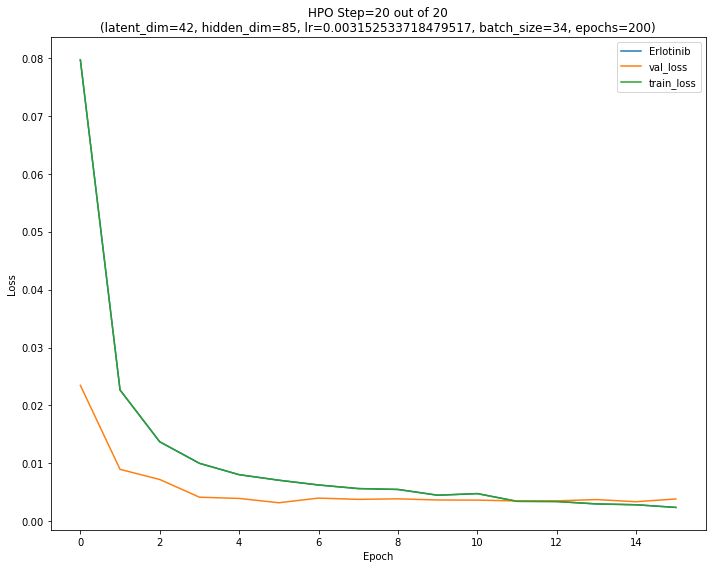

Monitored metric val_loss did not improve in the last 10 records. Best score: 0.003. Signaling Trainer to stop.


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Erlotinib         │   0.0038682662416249514   │
│         val_loss          │   0.0038682662416249514   │
└───────────────────────────┴───────────────────────────┘

Tuning Progress: 100%|██████████| 20/20 [06:32<00:00, 19.65s/it, Iteration=20, Best Loss=0.0034]


{'latent_dim': 21,
 'hidden_dim': 81,
 'lr': 0.0008169970804249931,
 'batch_size': 33,
 'epochs': 200}

In [6]:
model, best_params = tuner.perform_tuning()
best_params

In [7]:
y_pred_dict = model.predict(test_dataset)

In [8]:
metrics_df = flexynesis.evaluate_wrapper(y_pred_dict, test_dataset)
metrics_df

,var,variable_type,metric,value
0,Erlotinib,numerical,mse,0.005660
1,Erlotinib,numerical,r2,0.091991
2,Erlotinib,numerical,pearson_corr,0.420663


In [10]:
y_pred_dict

{'Erlotinib': array([[ 0.20986274],
        [ 0.0230908 ],
        [ 0.10689797],
        [ 0.10277813],
        [ 0.2392107 ],
        [ 0.1259799 ],
        [ 0.14324827],
        [ 0.07006501],
        [ 0.10543065],
        [ 0.07308634],
        [ 0.10040672],
        [ 0.07579619],
        [ 0.09220643],
        [ 0.09401517],
        [ 0.06247905],
        [ 0.11502219],
        [ 0.07852632],
        [ 0.12296702],
        [ 0.11236715],
        [ 0.0410968 ],
        [ 0.02059021],
        [ 0.05694161],
        [ 0.0972902 ],
        [ 0.08677592],
        [ 0.10451673],
        [ 0.02214923],
        [ 0.07012391],
        [ 0.07815412],
        [ 0.06575707],
        [ 0.13524398],
        [ 0.11381477],
        [ 0.02535222],
        [ 0.12700924],
        [ 0.11401962],
        [ 0.07996248],
        [ 0.06392722],
        [ 0.07506731],
        [ 0.09236604],
        [ 0.0216777 ],
        [ 0.11778802],
        [ 0.1308439 ],
        [ 0.09162854],
        [ 0.10382605]

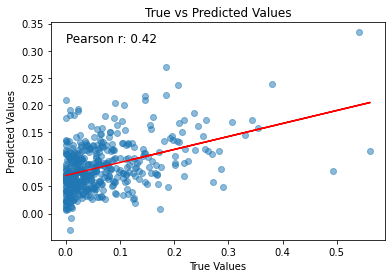

In [19]:
flexynesis.plot_scatter(test_dataset.ann['Erlotinib'].flatten(), y_pred_dict['Erlotinib'].flatten())

In [20]:
for var in model.target_variables:
    model.compute_feature_importance(var, steps = 50)

In [21]:
top_features = flexynesis.get_important_features(model, "Erlotinib", top=10)

In [22]:
top_features

,target_variable,target_class,layer,name,importance
0,Erlotinib,0,cnv,EGFR,0.003983
1,Erlotinib,0,cnv,CCL21,0.002347
2,Erlotinib,0,cnv,LRRTM2,0.002241
3,Erlotinib,0,cnv,HBQ1,0.002191
4,Erlotinib,0,cnv,NIN,0.002158
5,Erlotinib,0,cnv,FOXC1,0.002124
6,Erlotinib,0,cnv,COL4A2,0.002105
7,Erlotinib,0,cnv,PGGT1B,0.002002
8,Erlotinib,0,cnv,DTYMK,0.001967
9,Erlotinib,0,cnv,DEPDC5,0.001957


In [23]:
df = test_dataset.get_feature_subset(top_features)
df

,cnv_EGFR,cnv_CCL21,cnv_LRRTM2,cnv_HBQ1,cnv_NIN,cnv_FOXC1,cnv_COL4A2,cnv_PGGT1B,cnv_DTYMK,cnv_DEPDC5
target_dataset:HEC-265,-0.672860,-0.421361,-0.628338,-0.656412,-0.548186,-0.604757,-0.252387,-0.575672,-0.556402,-0.462089
target_dataset:Ci-1,-0.902994,-0.345044,-0.586447,-0.504610,-0.431585,-0.490277,-0.368769,-0.531540,-0.515458,-0.359845
target_dataset:BICR 18,-0.836547,-0.470863,-0.645094,-0.568269,-0.573449,-0.545473,-0.358347,-0.593325,-0.476789,-0.419289
target_dataset:CL-11,0.255780,0.001472,0.312107,-0.205902,-0.083726,0.153672,0.088073,0.415089,0.337539,0.465234
target_dataset:NCI-H1666,0.041853,0.669754,0.297445,0.602079,0.421545,0.540041,0.484118,0.399643,0.671914,-0.217180
...,...,...,...,...,...,...,...,...,...,...
target_dataset:M-07e,-0.786307,-0.470863,-0.582258,-0.470332,-0.511262,-0.492322,-0.313184,-0.527127,-2.103170,-0.269491
target_dataset:U-178MG,-0.846271,-0.454362,-0.663945,-0.524197,-0.526809,-0.557739,-0.339240,-0.613184,-0.444944,-0.416911
target_dataset:WM88,0.032129,-0.347107,-0.571785,0.744087,-0.655070,0.431694,0.247880,-0.516094,-0.360781,0.966939
target_dataset:MFE-280,0.032129,-0.516240,-0.663945,-0.531542,-0.435472,1.320958,-0.327080,-0.540367,-0.469965,-0.514399


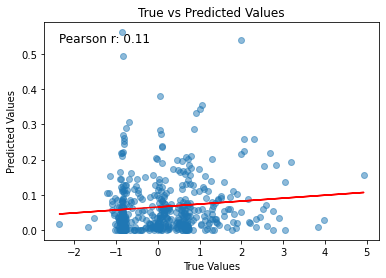

In [24]:
f = 'cnv_EGFR'
flexynesis.plot_scatter(df[f], test_dataset.ann['Erlotinib'])

In [25]:
response_category = flexynesis.split_by_median(test_dataset.ann['Erlotinib'])

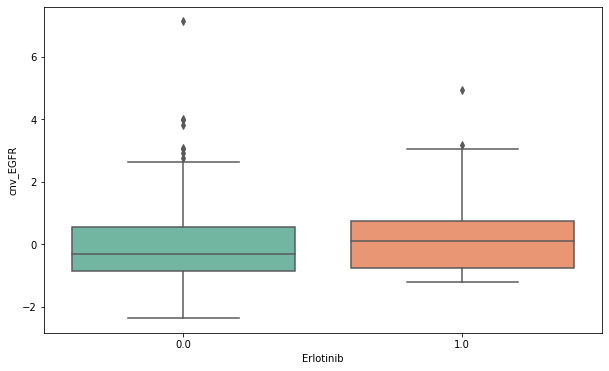

In [26]:
flexynesis.plot_boxplot(response_category, df[f], 'Erlotinib', f)